## Real Estate House Price Prediction 

 Linear Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Data/Real estate.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df= df.drop('No', axis=1)

In [7]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [8]:
df.columns = ['transaction date','house age','distance to the nearest MRT station','number of convenience stores','latitude','longitude','house price of unit area']

In [9]:
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
df.isna().sum()

transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

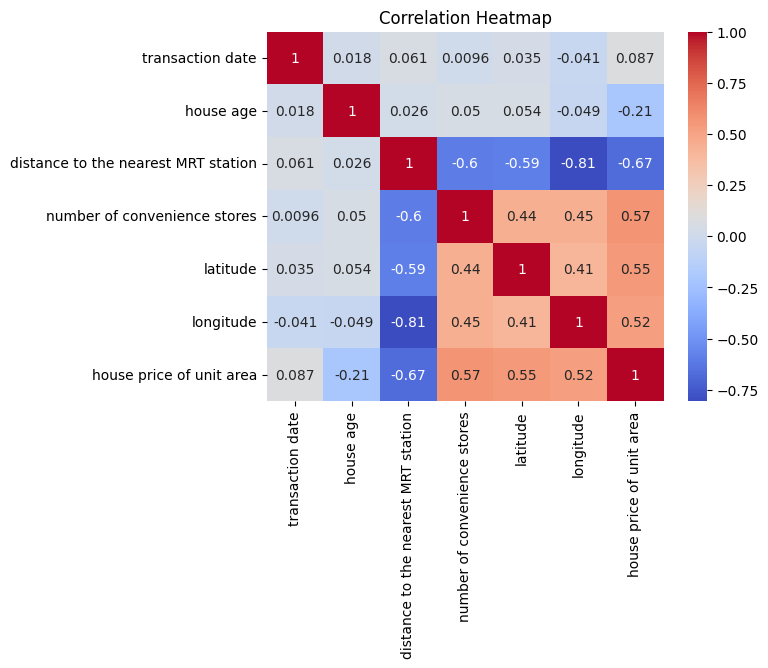

In [11]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

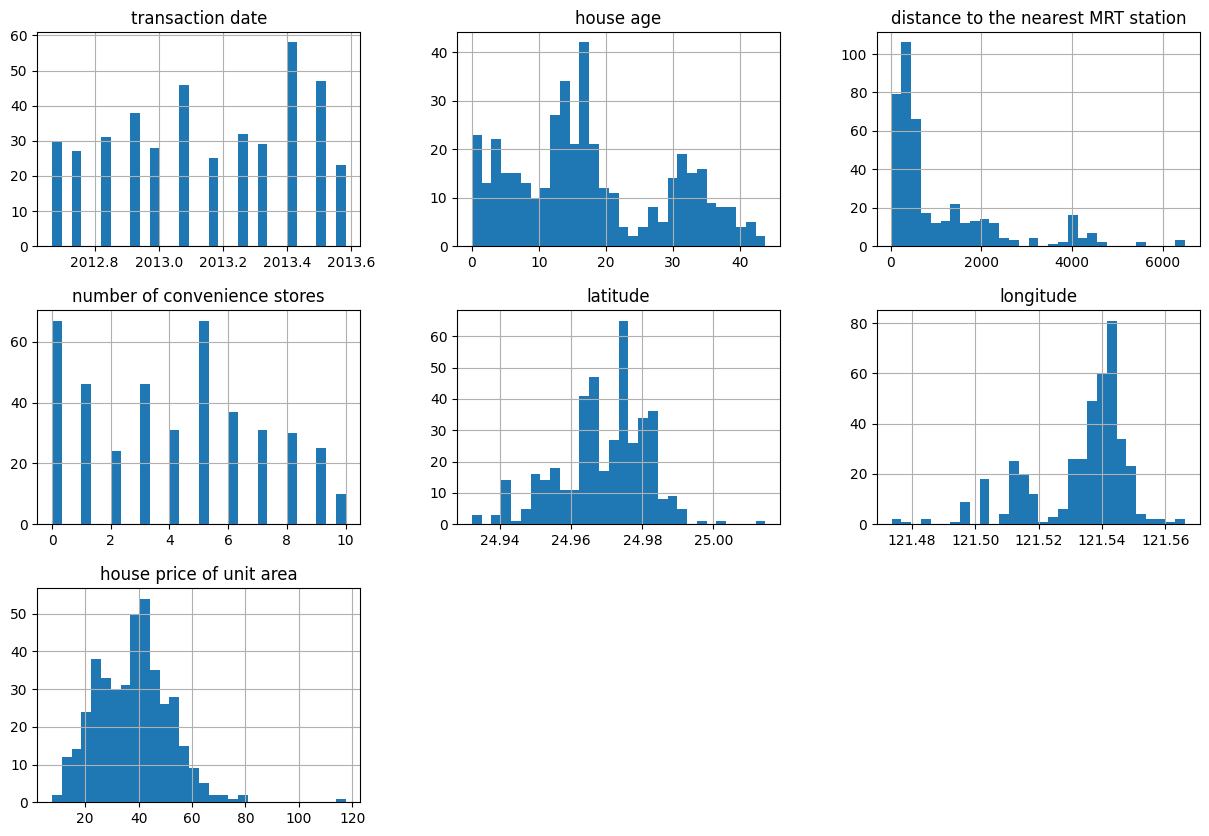

<Figure size 1000x1500 with 0 Axes>

In [12]:
df.hist(bins=30,figsize=(15, 10))
plt.figure(figsize=(10,15))
plt.show()

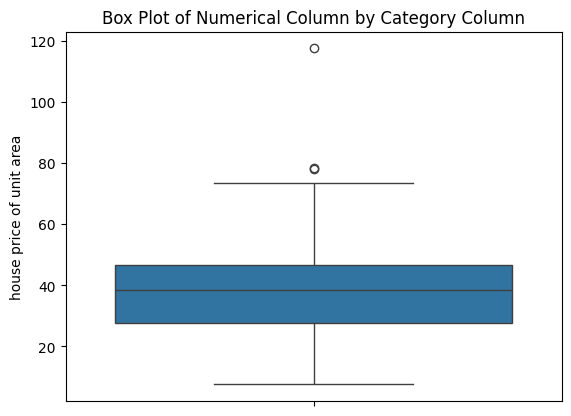

In [13]:

sns.boxplot( y='house price of unit area', data=df)
plt.title('Box Plot of Numerical Column by Category Column')
plt.show()


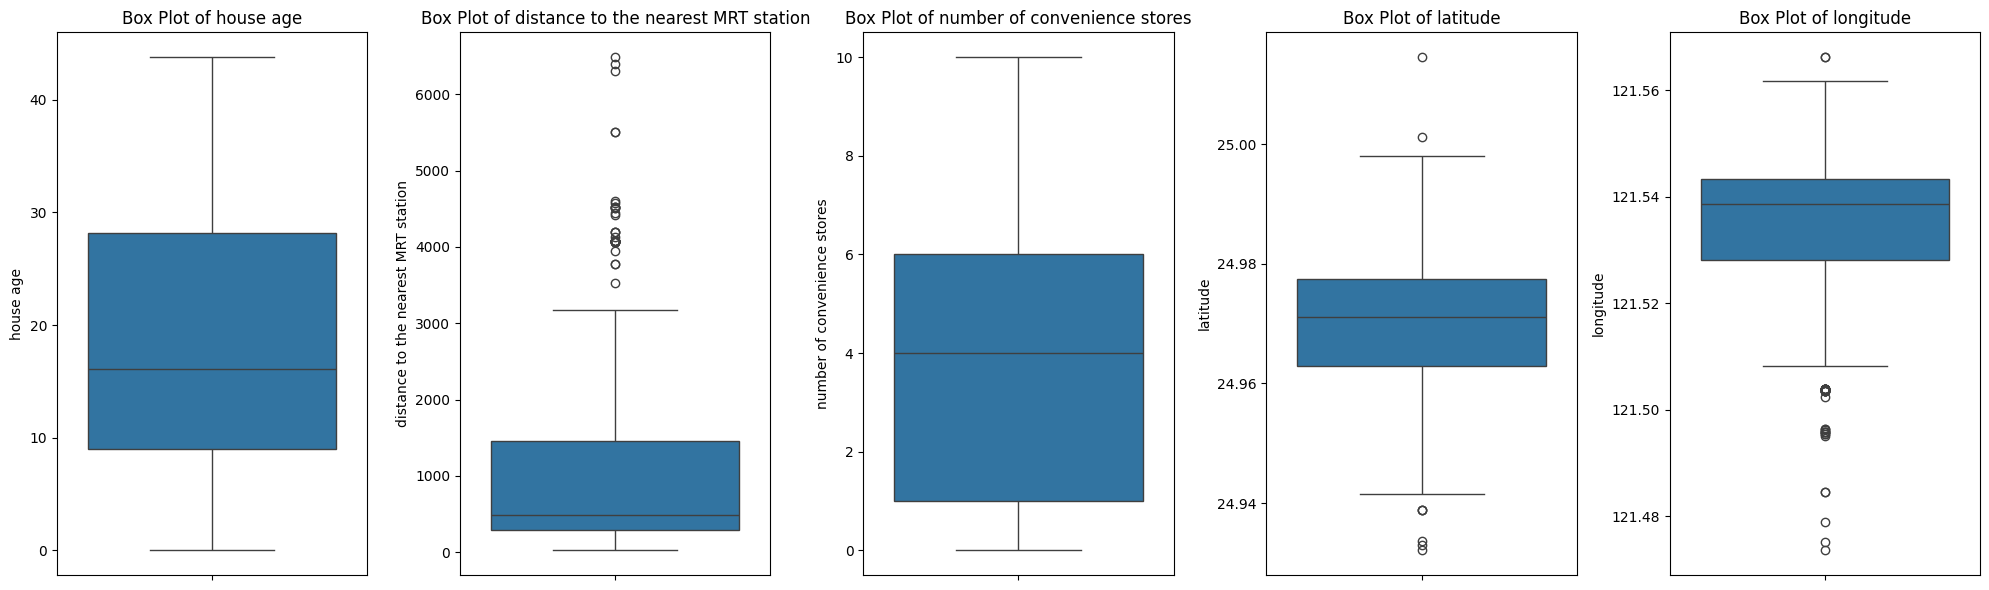

In [14]:
numerical_columns = ['house age', 'distance to the nearest MRT station', 
                     'number of convenience stores', 'latitude', 'longitude']

fig, axes = plt.subplots(1, 5, figsize=(20, 6))
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


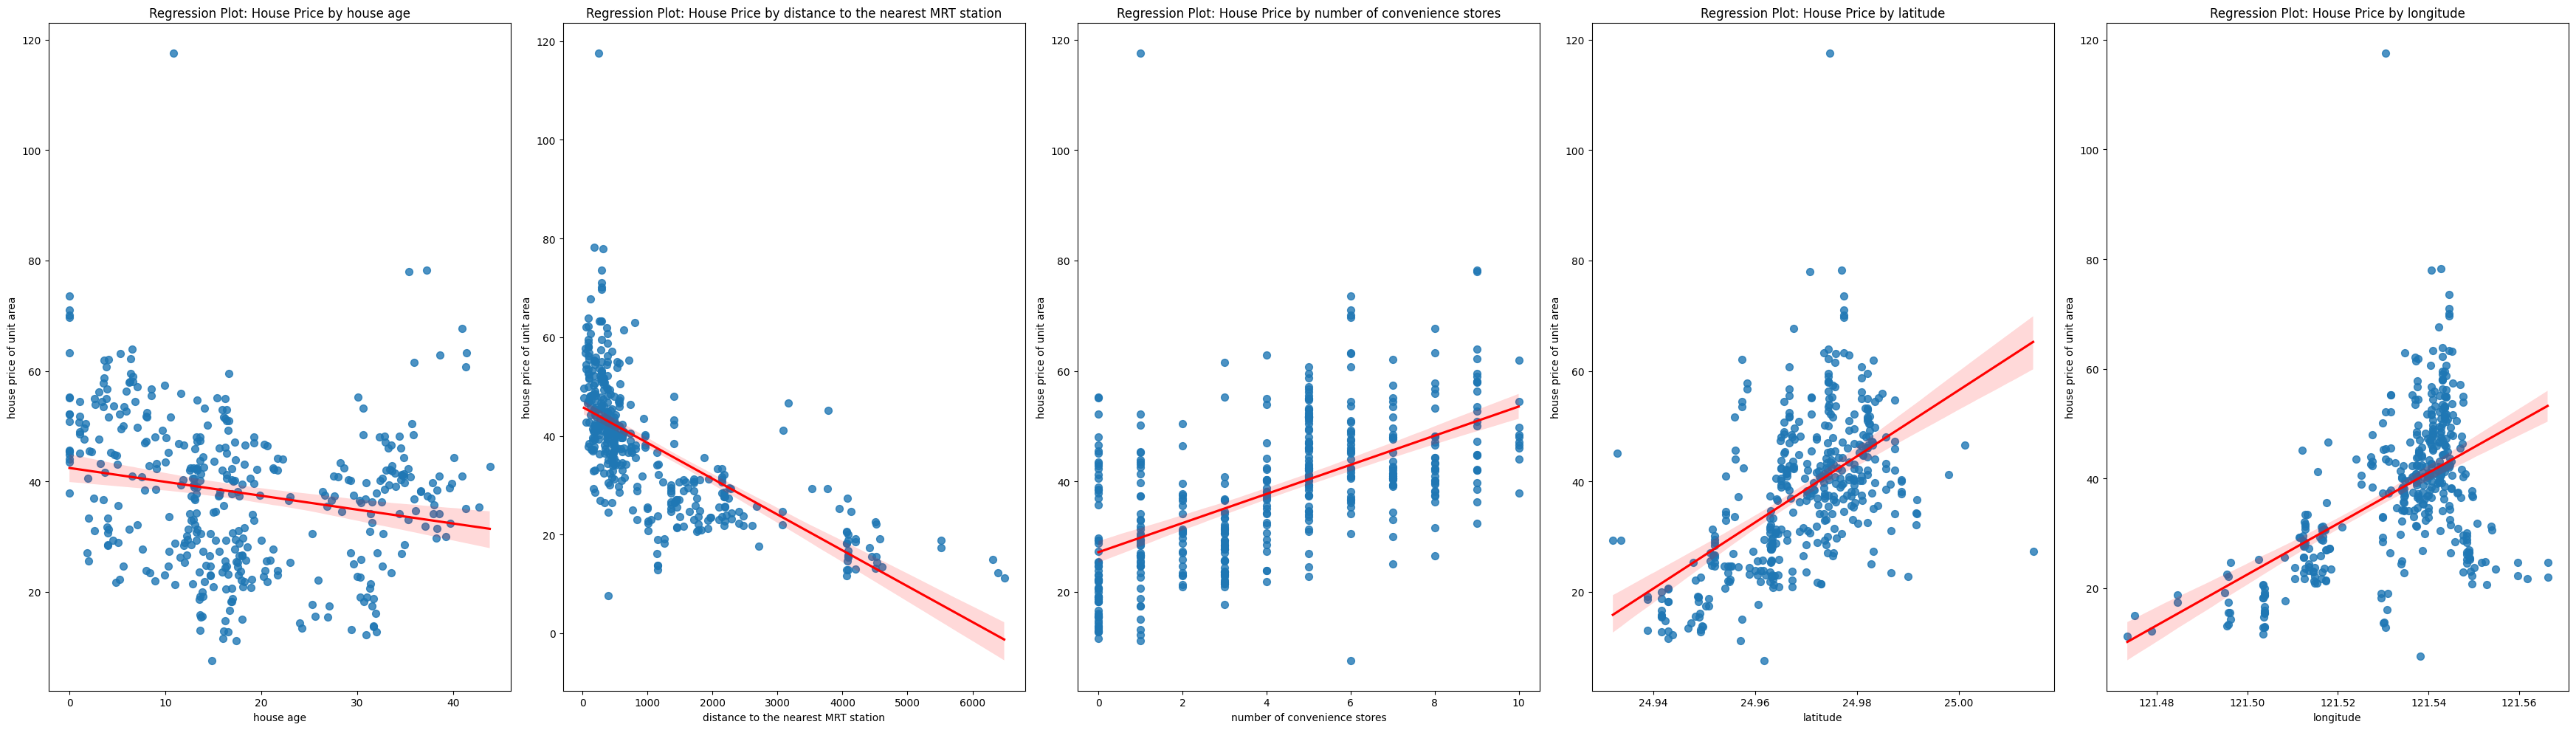

In [15]:

numerical_columns = ['house age', 'distance to the nearest MRT station', 
                     'number of convenience stores', 'latitude', 'longitude']
fig, axes = plt.subplots(1, 5, figsize=(35, 10))
for i, column in enumerate(numerical_columns):
    sns.regplot(x=column, y='house price of unit area', data=df, 
                scatter_kws={'s': 50}, line_kws={'color': 'red'}, ax=axes[i])
    axes[i].set_title(f'Regression Plot: House Price by {column}')
plt.tight_layout()
plt.show()


In [16]:
df = df.drop('transaction date', axis=1)

In [17]:
X = df.drop('house price of unit area', axis=1) 
y = df['house price of unit area']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Instantiate the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [20]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 54.58094520086278
R-squared: 0.6746481382828138


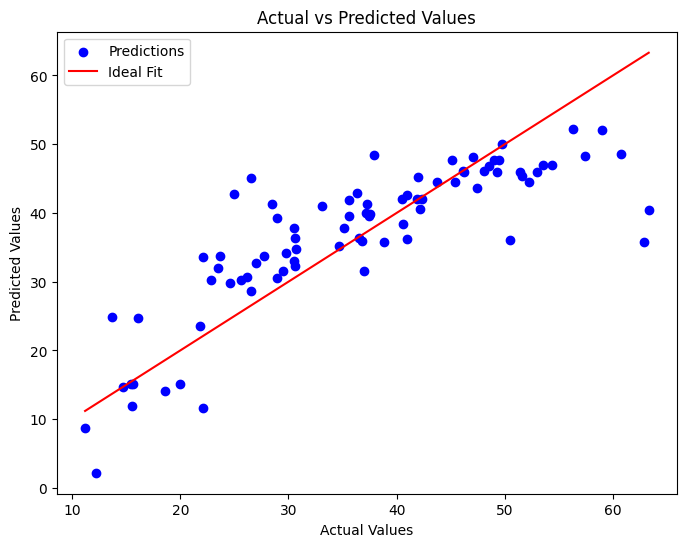

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## Summary
MSE = 54.58 indicates the average squared error between predicted and actual values.

R² = 0.675 suggests that your model explains 67.5% of the variance in the target variable, which is a decent fit but still leaves room for improvement.

In [22]:
# Intercept and Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: -2946.658859024451
Coefficients: [-2.70593236e-01 -4.55249601e-03  1.10512079e+00  2.36092831e+02
 -2.39036942e+01]


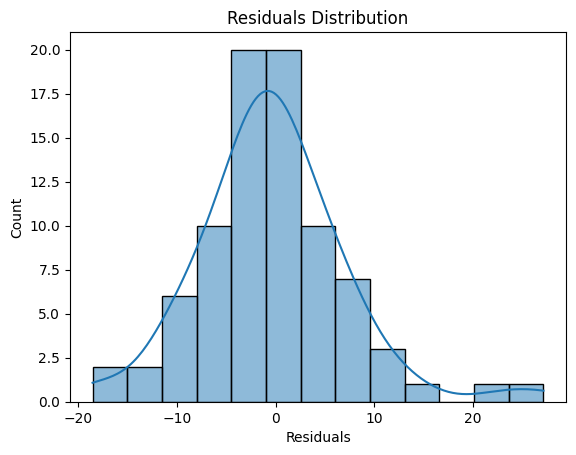

In [23]:
# Residuals plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()


## Improving Model Performance

In [24]:
numerical_columns = ['house age', 'distance to the nearest MRT station', 
                     'number of convenience stores', 'latitude', 'longitude']

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the range for normal data
df1 = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


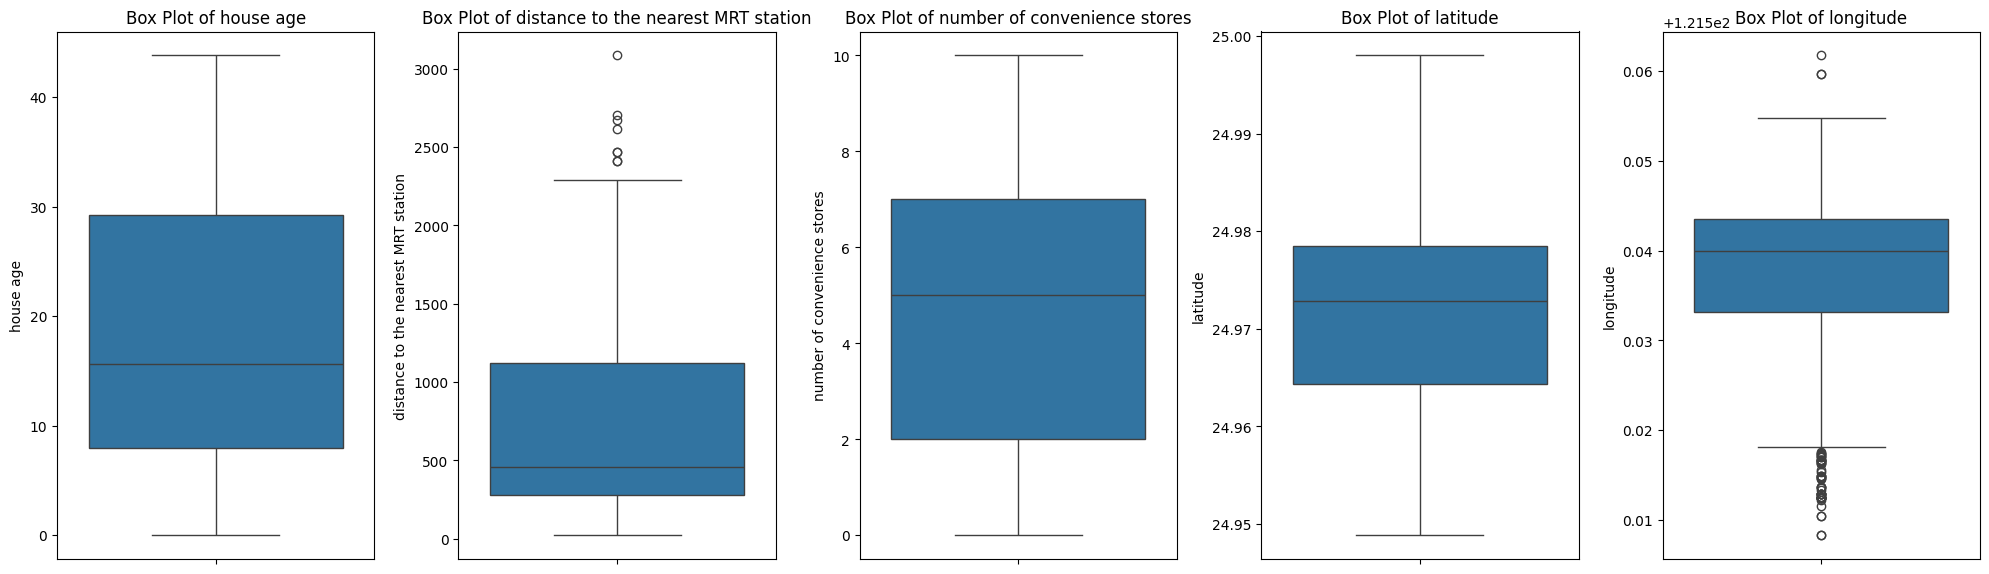

In [25]:


fig, axes = plt.subplots(1, 5, figsize=(20, 6))
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=column, data=df1, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [26]:
df1.columns

Index(['house age', 'distance to the nearest MRT station',
       'number of convenience stores', 'latitude', 'longitude',
       'house price of unit area'],
      dtype='object')

In [27]:
X1 = df.drop('house price of unit area', axis=1) 
y1 = df['house price of unit area']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

In [29]:
# Instantiate the model
model1 = LinearRegression()

# Train the model
model1.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 45.424791224614694
R-squared: 0.7007314553053445


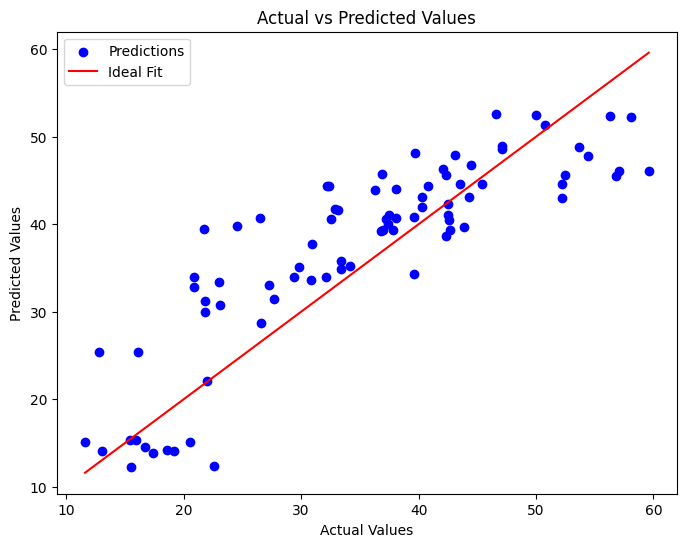

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()